# Birth rate analysis
Author: Quyen Phan

Upload 'births.csv' file to folder 'assignments'

#### Reading data

In [9]:
# Data frames.
import pandas as pd

# Load the CSV into a DataFrame:
br = pd.read_csv("births.csv")

# Visualise tableau
br.head()

,Statistic Label,Year,Sex,Criteria for Projection,UNIT,VALUE
0,Projected Annual Births,2023,Both sexes,Method - M1,Number,57537
1,Projected Annual Births,2024,Both sexes,Method - M1,Number,55528
2,Projected Annual Births,2025,Both sexes,Method - M1,Number,55292
3,Projected Annual Births,2026,Both sexes,Method - M1,Number,55032
4,Projected Annual Births,2027,Both sexes,Method - M1,Number,54462


#### Plot projected birth rate

Text(0, 0.5, 'Number of Births')

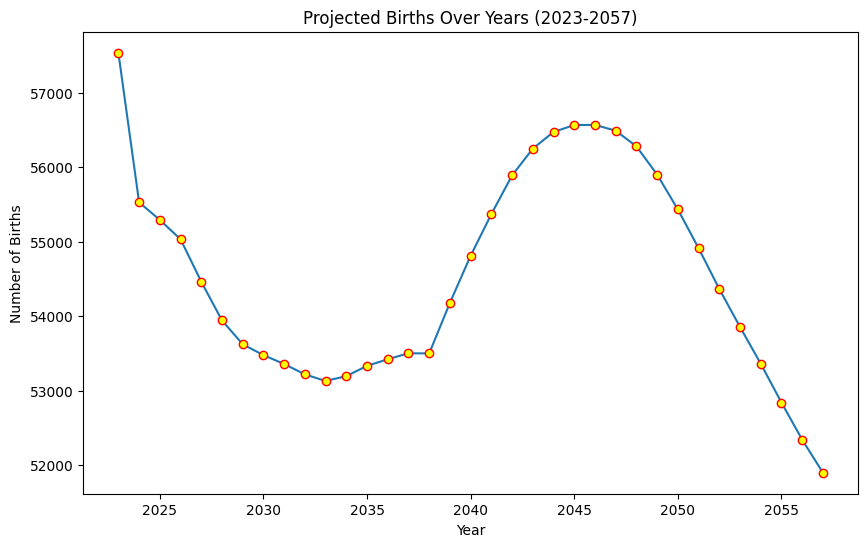

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
# Create histograms
plt.plot(br["Year"], br["VALUE"], marker='o',markerfacecolor='yellow', markeredgecolor='red')
plt.title("Projected Births Over Years (2023-2057)")
plt.xlabel("Year")
plt.ylabel("Number of Births")

# Plot task
Upload "populationbyage.csv" to folder 'assignments'

#### Reading Data

In [11]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV into a DataFrame:
pop = pd.read_csv("populationbyage.csv")

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Statistic Label          3264 non-null   object
 1   CensusYear               3264 non-null   int64 
 2   Sex                      3264 non-null   object
 3   Single Year of Age       3264 non-null   object
 4   Administrative Counties  3264 non-null   object
 5   UNIT                     3264 non-null   object
 6   VALUE                    3264 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 178.6+ KB


In [12]:
# Delete unnessessary columns
drop_col_list = ["Statistic Label","CensusYear","UNIT"]
pop.drop(columns=drop_col_list, inplace=True)

In [13]:
# Get rid of all value in column "Single Year of Age" that are "All ages"
pop = pop[pop["Single Year of Age"] != "All ages"]

In [14]:
# Change the columns "Single Year of Age"
pop["Single Year of Age"] = pop["Single Year of Age"].str.replace('Under 1 year', '0')
pop["Single Year of Age"] = pop["Single Year of Age"].str.replace('\D', '', regex=True)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_81112/310502111.py:3: SyntaxWarning: invalid escape sequence '\D'
  pop["Single Year of Age"] = pop["Single Year of Age"].str.replace('\D', '', regex=True)


In [15]:
# Turn the values of columns 'Single Year of Age' and 'VALUE' into integer
pop['Single Year of Age']=pop['Single Year of Age'].astype('int64')
pop['VALUE']=pop['VALUE'].astype('int64')

#### Pivot table

In [16]:
pop_anal = pd.pivot_table(pop,values='VALUE',
                          index="Single Year of Age",
                          columns="Administrative Counties",
                          aggfunc='sum')

#### Plot population by age

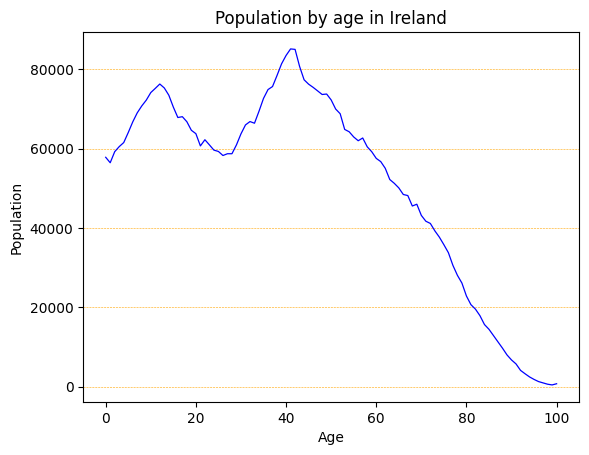

In [17]:
pop_anal['Ireland'].plot(color="blue",linewidth=0.9)
plt.title('Population by age in Ireland')
plt.xlabel('Age')
plt.ylabel('Population')
plt.grid(axis = 'y',color = 'orange', linestyle = '--', linewidth = 0.4)
plt.show()